In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [150]:
RAW_DATA = pd.read_csv('data_cardiovascular_risk.csv', index_col='id')
RAW_DATA.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [133]:
RAW_DATA.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [134]:
chd_binary = RAW_DATA["TenYearCHD"] == 1

chd_positive = RAW_DATA[chd_binary]
chd_positive.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,511.000000,498.000000,510.000000,504.000000,511.000000,511.000000,511.000000,504.000000,511.000000,511.000000,504.000000,510.000000,472.000000,511.0
mean,54.129159,1.843373,10.947059,0.065476,0.019569,0.499022,0.064579,247.216270,143.854207,86.763209,26.452560,76.552941,89.970339,1.0
std,8.125664,1.032454,13.079143,0.247610,0.138651,0.500489,0.246023,49.471228,27.061219,14.043026,4.590605,12.171020,42.443958,0.0
min,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,50.000000,45.000000,1.0
25%,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215.000000,126.000000,78.000000,23.322500,68.000000,72.000000,1.0
50%,55.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,243.000000,139.000000,85.000000,26.190000,75.000000,79.500000,1.0
75%,61.000000,2.000000,20.000000,0.000000,0.000000,1.000000,0.000000,273.000000,158.000000,95.000000,28.925000,84.000000,92.000000,1.0
max,70.000000,4.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,135.000000,56.800000,120.000000,394.000000,1.0


In [135]:
chd_negative = RAW_DATA[~chd_binary]
chd_negative.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2879.000000,2805.000000,2858.000000,2842.000000,2879.000000,2879.000000,2879.000000,2848.000000,2879.000000,2879.000000,2872.000000,2879.000000,2614.000000,2879.0
mean,48.728031,1.993583,8.734430,0.023575,0.004168,0.282737,0.018757,235.279494,130.603856,82.194338,25.679565,75.875304,80.662969,0.0
std,8.417156,1.015199,11.622571,0.151747,0.064437,0.450408,0.135688,44.225940,20.710453,11.495256,4.016071,11.935491,18.868206,0.0
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,50.000000,16.480000,45.000000,40.000000,0.0
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.910000,68.000000,71.000000,0.0
50%,48.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.230000,75.000000,78.000000,0.0
75%,55.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,141.000000,88.000000,27.870000,83.000000,86.000000,0.0
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,243.000000,142.500000,51.280000,143.000000,386.000000,0.0


In [136]:
aggregations = {"sysBP": ["mean", "median", "count"], "diaBP": ["mean", "median", "count"], "heartRate": ["mean", "median", "count"]}
chd_group = RAW_DATA.groupby("TenYearCHD")

chd_aggregate = chd_group.agg(aggregations)
chd_aggregate

sysBP                   diaBP               heartRate         \
                  mean median count       mean median count       mean median   
TenYearCHD                                                                      
0           130.603856  127.0  2879  82.194338   81.0  2879  75.875304   75.0   
1           143.854207  139.0   511  86.763209   85.0   511  76.552941   75.0   

                  
           count  
TenYearCHD        
0           2879  
1            510

In [137]:
smoker_group = RAW_DATA.groupby('is_smoking')
smoker_agg = smoker_group.agg({"TenYearCHD": "mean"})

smoker_agg

,TenYearCHD
is_smoking,
NO,0.138579
YES,0.163011


<Axes: xlabel='sysBP', ylabel='Count'>

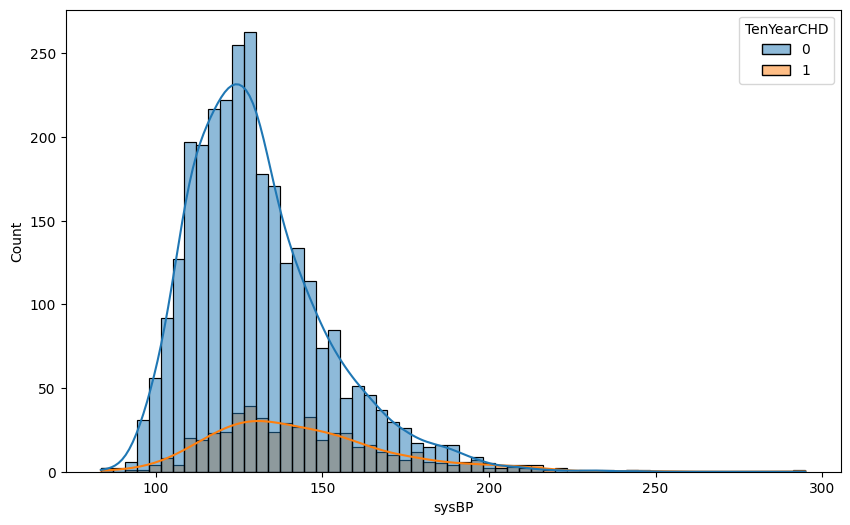

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(data = RAW_DATA, x = 'sysBP', kde=True, hue='TenYearCHD')

<Axes: xlabel='age', ylabel='Count'>

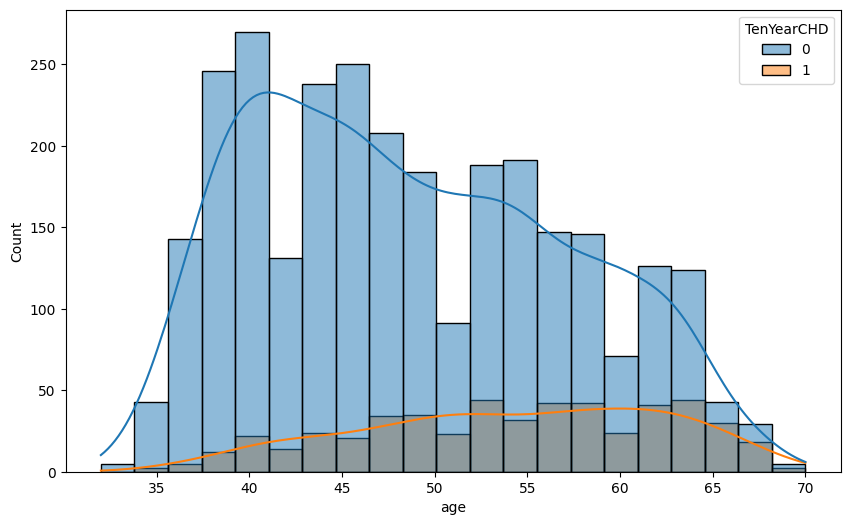

In [139]:
plt.figure(figsize=(10,6))
sns.histplot(data = RAW_DATA, x = 'age', kde=True, hue='TenYearCHD')

<Axes: xlabel='totChol', ylabel='Count'>

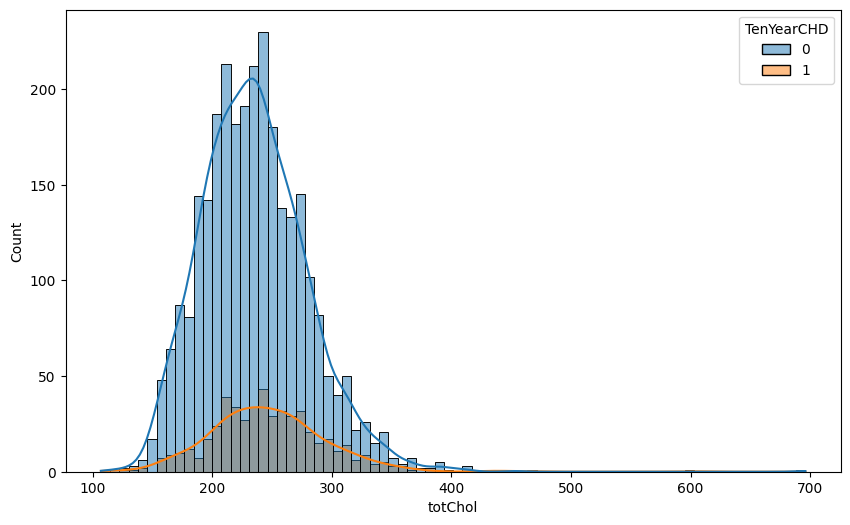

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(data = RAW_DATA, x = 'totChol', kde=True, hue='TenYearCHD')

<Axes: xlabel='is_smoking', ylabel='sysBP'>

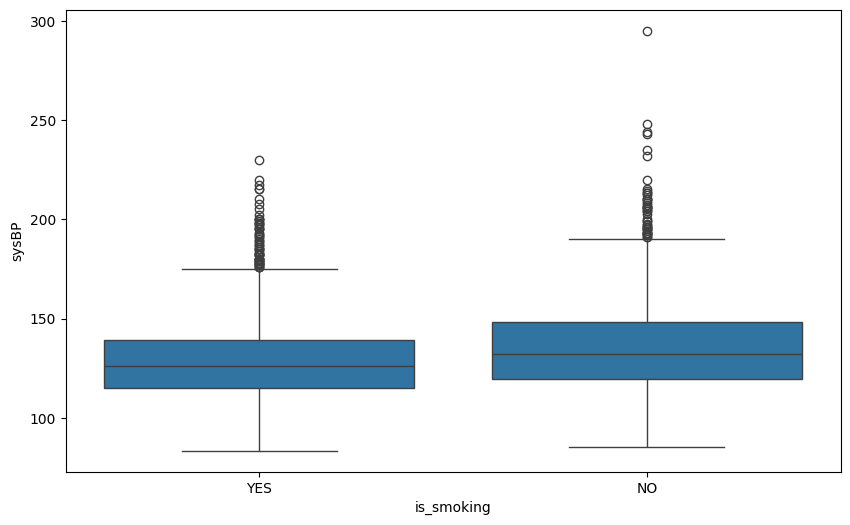

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(data=RAW_DATA, x='is_smoking', y='sysBP')

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

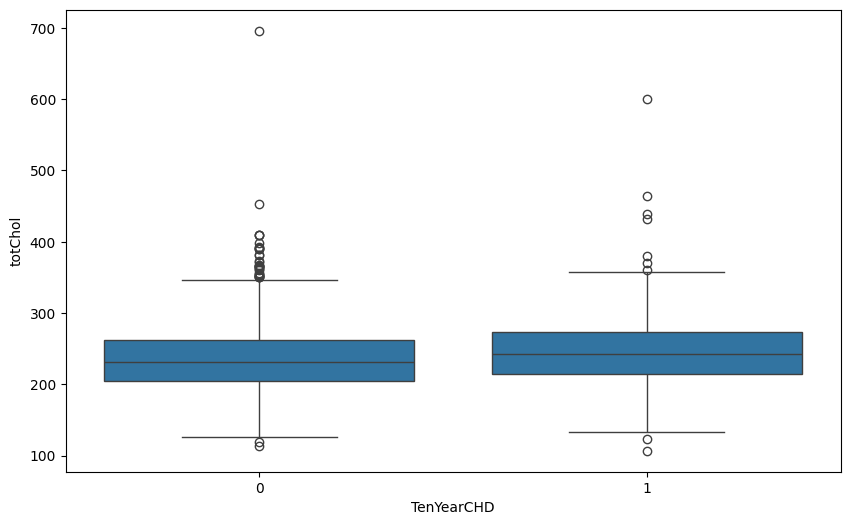

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(data=RAW_DATA, x='TenYearCHD', y='totChol')

In [154]:
features = ['age', 'sex', 'cigsPerDay', 'diaBP', 'sysBP', 'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
df = RAW_DATA[features]

df['sex'] = (df['sex'] == 'M').astype(int)
df.rename(columns={"sex": "isMale"}, inplace=True)
df.fillna(inplace=True, method='bfill')

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)
df.head()

/tmp/ipykernel_3377/3924734319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = (df['sex'] == 'M').astype(int)
/tmp/ipykernel_3377/3924734319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"sex": "isMale"}, inplace=True)
/tmp/ipykernel_3377/3924734319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(inplace=True, method='bfill')

,age,isMale,cigsPerDay,diaBP,sysBP,totChol,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,
0,64,0,3.0,85.0,148.0,221.0,29.77,90.0,80.0,1
1,36,1,0.0,98.0,168.0,212.0,29.77,72.0,75.0,0
2,46,0,10.0,71.0,116.0,250.0,20.35,88.0,94.0,0
3,50,1,20.0,88.0,158.0,233.0,28.26,68.0,94.0,1
4,64,0,30.0,85.0,136.5,241.0,26.42,70.0,77.0,0


/home/tomasaki/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/tomasaki/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/tomasaki/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/tomasaki/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

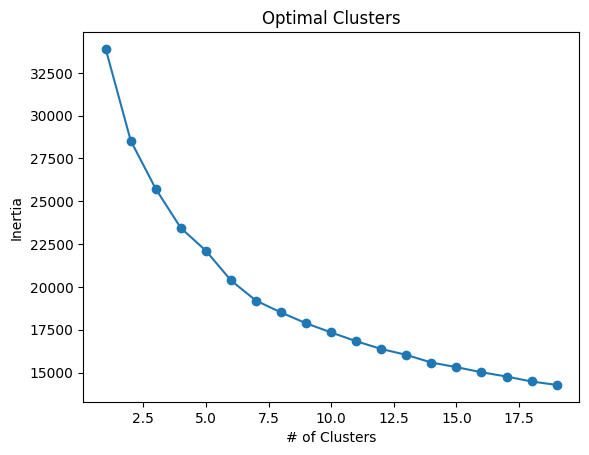

In [158]:
inertias = []

top = 20

for k in range(1, top):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, top), inertias, marker = 'o')
plt.title('Optimal Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.show()

/home/tomasaki/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_3377/1489687702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Patient Category'] = categories


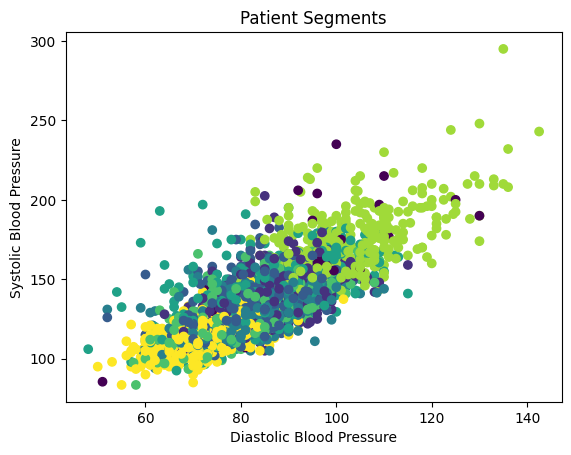

In [161]:
cluster_count = 8
cluster_analysis = KMeans(n_clusters=cluster_count, random_state=42)

categories = cluster_analysis.fit_predict(scaled_data)
RAW_DATA['Patient Category'] = categories
df['Patient Category'] = categories

plt.scatter(RAW_DATA['diaBP'], RAW_DATA['sysBP'], c=df['Patient Category'], cmap='viridis')
plt.title('Patient Segments')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.show()

In [169]:
def describe_patient_group(group, df = RAW_DATA):
    output = df[df['Patient Category'] == group]
    print(output.describe())

In [173]:
for i in range(1, cluster_count):
    describe_patient_group(i, df[['TenYearCHD', 'Patient Category']])

       TenYearCHD  Patient Category
count  319.000000             319.0
mean     0.006270               1.0
std      0.079056               0.0
min      0.000000               1.0
25%      0.000000               1.0
50%      0.000000               1.0
75%      0.000000               1.0
max      1.000000               1.0
       TenYearCHD  Patient Category
count  522.000000             522.0
mean     0.001916               2.0
std      0.043769               0.0
min      0.000000               2.0
25%      0.000000               2.0
50%      0.000000               2.0
75%      0.000000               2.0
max      1.000000               2.0
       TenYearCHD  Patient Category
count       514.0             514.0
mean          0.0               3.0
std           0.0               0.0
min           0.0               3.0
25%           0.0               3.0
50%           0.0               3.0
75%           0.0               3.0
max           0.0               3.0
       TenYearCHD  Patient C

In [179]:
clustered_groupby = df.groupby('Patient Category')

clustered_groupby.agg({'TenYearCHD': 'mean'})

,TenYearCHD
Patient Category,
0,0.529412
1,0.006270
2,0.001916
3,0.000000
4,1.000000
5,0.003527
6,0.164087
7,0.011696


In [177]:
describe_patient_group(0, RAW_DATA)

             age  education  cigsPerDay     BPMeds  prevalentStroke  \
count  34.000000  33.000000   34.000000  34.000000        34.000000   
mean   52.764706   1.606061    5.617647   0.117647         0.029412   
std     8.086872   0.826869    9.092170   0.327035         0.171499   
min    36.000000   1.000000    0.000000   0.000000         0.000000   
25%    47.000000   1.000000    0.000000   0.000000         0.000000   
50%    52.500000   1.000000    0.000000   0.000000         0.000000   
75%    58.000000   2.000000   15.000000   0.000000         0.000000   
max    67.000000   4.000000   30.000000   1.000000         1.000000   

       prevalentHyp   diabetes     totChol       sysBP       diaBP        BMI  \
count     34.000000  34.000000   34.000000   34.000000   34.000000  33.000000   
mean       0.529412   0.941176  250.470588  151.044118   88.573529  28.518182   
std        0.506640   0.238833   47.352473   37.375930   17.935124   5.822368   
min        0.000000   0.000000  155.

In [183]:
patient_group_4 = RAW_DATA[RAW_DATA['Patient Category'] == 4]

patient_group_4

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Patient Category
id,,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,4
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,4
15,51,1.0,M,YES,15.0,0.0,0,0,0,212.0,146.0,89.0,24.49,100.0,132.0,1,4
20,42,1.0,F,YES,20.0,0.0,0,1,0,199.0,141.0,92.0,43.69,80.0,60.0,1,4
29,63,1.0,F,NO,0.0,0.0,1,1,0,273.0,152.0,70.0,19.69,80.0,79.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,41,2.0,M,YES,20.0,0.0,0,0,0,212.0,112.0,63.5,25.20,80.0,76.0,1,4
3348,53,1.0,M,NO,0.0,0.0,0,1,0,240.0,174.5,103.0,29.82,81.0,74.0,1,4
3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1,4
